In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
# Add the latitudes and longitudes to a list.
#You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

84

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
#Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.

#We will need to do the following:

#Import our dependencies and initialize counters and an empty list that will hold the weather data.
#Loop through the cities list.
#Group the cities in sets of 50 to log the process as we find the weather data for each city.
#Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
#Build the city_url or endpoint for each city.
#Log the URL and the record and set numbers.
#Make an API request for each city.
#Parse the JSON weather data for the following:
#City, country, and date
##Latitude and longitude
#Maximum temperature
#Humidity
#Cloudiness
#Wind speed
#Add the data to a list in a dictionary format and then convert the list to a DataFrame.
#Import Dependencies, and Initialize an Empty List and Counters
#At the top of our code block, we are going to declare an empty list, city_data = []; add a print statement that references the beginning of the logging; and create counters for the record numbers, 1–50; and the set counter.

#We will now work in our WeatherPy.ipynb file. Before continuing, make sure the following tasks are completed:

#Import your Requests Library and the weather_api_key.
#Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
#In the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
#Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.

#Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate() method is the following:

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 2 | puerto ayora
Processing Record 2 of Set 2 | kodiak
Processing Record 3 of Set 2 | rikitea
Processing Record 4 of Set 2 | kirya
Processing Record 5 of Set 2 | richards bay
Processing Record 6 of Set 2 | bodoco
City not found. Skipping...
Processing Record 7 of Set 2 | ushuaia
Processing Record 8 of Set 2 | souillac
Processing Record 9 of Set 2 | ucluelet
Processing Record 10 of Set 2 | jurm
Processing Record 11 of Set 2 | port elizabeth
Processing Record 12 of Set 2 | balikpapan
Processing Record 13 of Set 2 | srednekolymsk
Processing Record 14 of Set 2 | new norfolk
Processing Record 15 of Set 2 | pevek
Processing Record 16 of Set 2 | warqla
City not found. Skipping...
Processing Record 17 of Set 2 | lafia
Processing Record 18 of Set 2 | bluff
Processing Record 19 of Set 2 | bambous virieux
Processing Record 20 of Set 2 | chuy
Processing Record 21 of Set 2 | yomou
Processing Record 22 of Set 2 | longyearbyen
Processing Record 23 of Set 2 | sumbe
Processin

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,75.00,93,100,1.99,EC,2021-01-13 02:27:24
1,Kodiak,57.7900,-152.4072,33.80,93,90,10.04,US,2021-01-13 02:23:57
2,Rikitea,-23.1203,-134.9692,77.99,78,3,16.73,PF,2021-01-13 02:27:24
3,Kirya,-3.9167,37.4833,69.06,80,78,3.53,TZ,2021-01-13 02:27:24
4,Richards Bay,-28.7830,32.0377,71.96,89,0,4.85,ZA,2021-01-13 02:26:40
5,Ushuaia,-54.8000,-68.3000,46.40,61,20,14.97,AR,2021-01-13 02:22:45
6,Souillac,-20.5167,57.5167,77.00,88,75,12.66,MU,2021-01-13 02:26:29
7,Ucluelet,48.9329,-125.5528,46.00,100,90,5.75,CA,2021-01-13 02:27:25
8,Jurm,36.8648,70.8342,31.84,50,0,6.42,AF,2021-01-13 02:27:25
9,Port Elizabeth,-33.9180,25.5701,69.80,88,90,6.91,ZA,2021-01-13 02:27:25


In [15]:
#Reorder columns
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayora,EC,2021-01-13 02:27:24,-0.7393,-90.3518,75.00,93,100,1.99
1,Kodiak,US,2021-01-13 02:23:57,57.7900,-152.4072,33.80,93,90,10.04
2,Rikitea,PF,2021-01-13 02:27:24,-23.1203,-134.9692,77.99,78,3,16.73
3,Kirya,TZ,2021-01-13 02:27:24,-3.9167,37.4833,69.06,80,78,3.53
4,Richards Bay,ZA,2021-01-13 02:26:40,-28.7830,32.0377,71.96,89,0,4.85
5,Ushuaia,AR,2021-01-13 02:22:45,-54.8000,-68.3000,46.40,61,20,14.97
6,Souillac,MU,2021-01-13 02:26:29,-20.5167,57.5167,77.00,88,75,12.66
7,Ucluelet,CA,2021-01-13 02:27:25,48.9329,-125.5528,46.00,100,90,5.75
8,Jurm,AF,2021-01-13 02:27:25,36.8648,70.8342,31.84,50,0,6.42
9,Port Elizabeth,ZA,2021-01-13 02:27:25,-33.9180,25.5701,69.80,88,90,6.91


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data./cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
#Get Data for Plotting
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610504870.870036

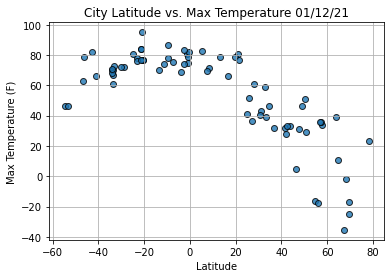

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data./Fig1.png")

# Show plot.
plt.show()

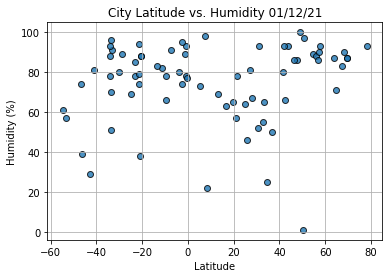

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data./Fig2.png")
# Show plot.
plt.show()

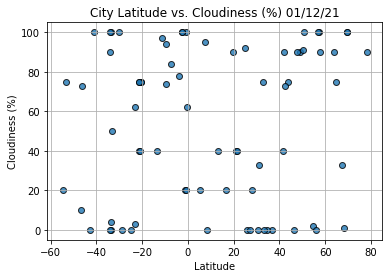

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data./Fig3.png")
# Show plot.
plt.show()

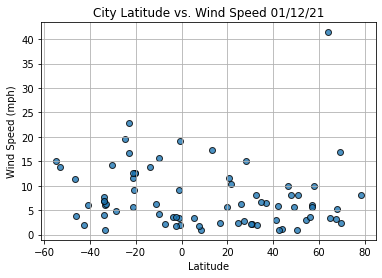

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data./Fig4.png")
# Show plot.
plt.show()